In [560]:
import pandas as pd
import numpy as np
import string
import re
import statistics
import math
from matplotlib import pyplot as plt # import pyplot submodule from matplotlib
plt.style.use('ggplot')

In [599]:
sephora_df = pd.read_csv('sephora.csv', index_col=0)
sephora_df.head() #len = 2458

,category,brand,product_name,price,size,star_review,num_reviews,ingredient_callouts,ingredients
0,moisturizing-cream-oils-mists,Drunk Elephant,Protini™ Polypeptide Moisturizer,$68.00,SIZE: 1.69 oz/ 50 mL,4 stars,4K reviews,Ingredient Callouts: This product is vegan and...,-Signal Peptide Complex (Growth Factors): Nine...
1,moisturizing-cream-oils-mists,Sol de Janeiro,Biggie Biggie Bum Bum Cream,$76.00,SIZE 16.9 oz/ 500 mL•ITEM 2376069,4.5 stars,5K reviews,Ingredient Callouts: Free of sulfates SLS and ...,-Guaraná: Contains five times the caffeine of ...
2,moisturizing-cream-oils-mists,La Mer,Crème de la Mer Moisturizer,$190.00,SIZE: 1 oz/ 30 mL,4 stars,684 reviews,Ingredient Callouts: Free of sulfates SLS and ...,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
3,moisturizing-cream-oils-mists,Dr. Jart+,Cicapair™ Tiger Grass Color Correcting Treatme...,$52.00,SIZE: 1.7 fl. oz/ 50 mL,4 stars,3K reviews,Ingredient Callouts: Free of sulfates SLS and ...,-Centella Asiatica Complex: Protects from envi...
4,moisturizing-cream-oils-mists,Tatcha,The Water Cream,$68.00,SIZE: 1.7 oz/ 50 mL,4 stars,3K reviews,None,-Japanese Wild Rose: Supports natural circulat...


In [600]:
# Drop duplicate products
sephora_df = sephora_df.drop_duplicates(keep='first')
len(sephora_df)

# Change price from string to float
for i in range(len(sephora_df)):
    price = sephora_df['price'].iloc[i].replace('$', '')
    sephora_df['price'].iloc[i] = float(price)
sephora_df.head()

,category,brand,product_name,price,size,star_review,num_reviews,ingredient_callouts,ingredients
0,moisturizing-cream-oils-mists,Drunk Elephant,Protini™ Polypeptide Moisturizer,68,SIZE: 1.69 oz/ 50 mL,4 stars,4K reviews,Ingredient Callouts: This product is vegan and...,-Signal Peptide Complex (Growth Factors): Nine...
1,moisturizing-cream-oils-mists,Sol de Janeiro,Biggie Biggie Bum Bum Cream,76,SIZE 16.9 oz/ 500 mL•ITEM 2376069,4.5 stars,5K reviews,Ingredient Callouts: Free of sulfates SLS and ...,-Guaraná: Contains five times the caffeine of ...
2,moisturizing-cream-oils-mists,La Mer,Crème de la Mer Moisturizer,190,SIZE: 1 oz/ 30 mL,4 stars,684 reviews,Ingredient Callouts: Free of sulfates SLS and ...,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
3,moisturizing-cream-oils-mists,Dr. Jart+,Cicapair™ Tiger Grass Color Correcting Treatme...,52,SIZE: 1.7 fl. oz/ 50 mL,4 stars,3K reviews,Ingredient Callouts: Free of sulfates SLS and ...,-Centella Asiatica Complex: Protects from envi...
4,moisturizing-cream-oils-mists,Tatcha,The Water Cream,68,SIZE: 1.7 oz/ 50 mL,4 stars,3K reviews,None,-Japanese Wild Rose: Supports natural circulat...


In [598]:
# Extract size in oz and create column with price/oz
oz_size = []
for i in range(len(sephora_df)):
    all_sizes = sephora_df['size'].iloc[i]
    #print(all_sizes)
    if re.findall('(\d*\.?\d+\soz)', all_sizes):
        temp_size = re.findall('(\d*\.?\d+\soz)', all_sizes)[0]
        oz_size.append(float(re.findall('(\d*\.?\d+)', temp_size)[0]))
    else:
        oz_size.append(float('NaN'))
sephora_df.loc[:,'size_oz'] = oz_size


pricePerOz = []
for i in range(len(sephora_df)):
    if sephora_df['size_oz'].iloc[i] != float('NaN'):
        pricePerOz.append(round(sephora_df['price'].iloc[i]/sephora_df['size_oz'].iloc[i],2))
    else:
        pricePerOz.append(float('NaN'))
sephora_df.loc[:,'per_oz'] = pricePerOz

sephora_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,category,brand,product_name,price,size,star_review,num_reviews,ingredient_callouts,ingredients,size_oz,per_oz
0,moisturizing-cream-oils-mists,Drunk Elephant,Protini™ Polypeptide Moisturizer,68,SIZE: 1.69 oz/ 50 mL,4 stars,4K reviews,Ingredient Callouts: This product is vegan and...,-Signal Peptide Complex (Growth Factors): Nine...,1.69,40.24
1,moisturizing-cream-oils-mists,Sol de Janeiro,Biggie Biggie Bum Bum Cream,76,SIZE 16.9 oz/ 500 mL•ITEM 2376069,4.5 stars,5K reviews,Ingredient Callouts: Free of sulfates SLS and ...,-Guaraná: Contains five times the caffeine of ...,16.90,4.50
2,moisturizing-cream-oils-mists,La Mer,Crème de la Mer Moisturizer,190,SIZE: 1 oz/ 30 mL,4 stars,684 reviews,Ingredient Callouts: Free of sulfates SLS and ...,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.00,190.00
3,moisturizing-cream-oils-mists,Dr. Jart+,Cicapair™ Tiger Grass Color Correcting Treatme...,52,SIZE: 1.7 fl. oz/ 50 mL,4 stars,3K reviews,Ingredient Callouts: Free of sulfates SLS and ...,-Centella Asiatica Complex: Protects from envi...,NaN,NaN
4,moisturizing-cream-oils-mists,Tatcha,The Water Cream,68,SIZE: 1.7 oz/ 50 mL,4 stars,3K reviews,None,-Japanese Wild Rose: Supports natural circulat...,1.70,40.00


In [565]:
# Function to look for bad ingredients in the list of product ingredients
def match_bad_ingredients(bad_ingredients):
    total_found = 0
    product_match = []
    for i in range(len(sephora_df)):
        ingredients = sephora_df['ingredients'].iloc[i].lower()
        if any(ingredient in ingredients for ingredient in bad_ingredients):
            total_found += 1
            product_match.append(sephora_df.iloc[i])

    product_match = pd.DataFrame(product_match)
    return product_match

In [566]:
squalene = ['squalene', 'squalane']
with_squalene = match_bad_ingredients(squalene)
len(with_squalene)

454

['Sol de Janeiro' "Kiehl's Since 1851" 'Tatcha' 'Youth To The People'
 'belif' 'First Aid Beauty' 'bareMinerals' 'Kate Somerville' 'Bobbi Brown'
 'Biossance' 'Glow Recipe' 'Drunk Elephant' 'The Ordinary' 'IT Cosmetics'
 'Skinfix' 'Perricone MD' 'Origins' 'SUNDAY RILEY' 'Caudalie' 'Shiseido'
 'Josie Maran' 'Herbivore' 'Estée Lauder' 'Dr. Dennis Gross Skincare'
 'SEPHORA COLLECTION' 'MILK MAKEUP' 'Algenist' 'LANEIGE' 'Beautycounter'
 'La Mer' 'CLINIQUE' 'Dermalogica' 'tarte' 'Peter Thomas Roth' 'Murad'
 'Dr. Barbara Sturm' 'goop' 'Charlotte Tilbury' 'Sulwhasoo' 'philosophy'
 'Clarins' 'Primera' 'alpyn beauty' 'The INKEY List' 'AMOREPACIFIC'
 'Lord Jones' 'Naturally Serious' 'Guerlain' 'LANCER Skincare'
 'REN Clean Skincare' 'Prima' 'innisfree' 'GLAMGLOW' 'Tata Harper'
 'KORRES' 'Lancôme' 'Indie Lee' 'Omorovicza' 'Lab Series For Men'
 'Mario Badescu' 'SOBEL SKIN Rx' 'Volition Beauty' 'Eve Lom'
 'Laura Mercier' 'Dr. Zenovia Skincare' 'Proactiv' 'Erborian'
 'Dr. Brandt Skincare' 'Fresh' 'An

Text(0, 0.5, 'Count')

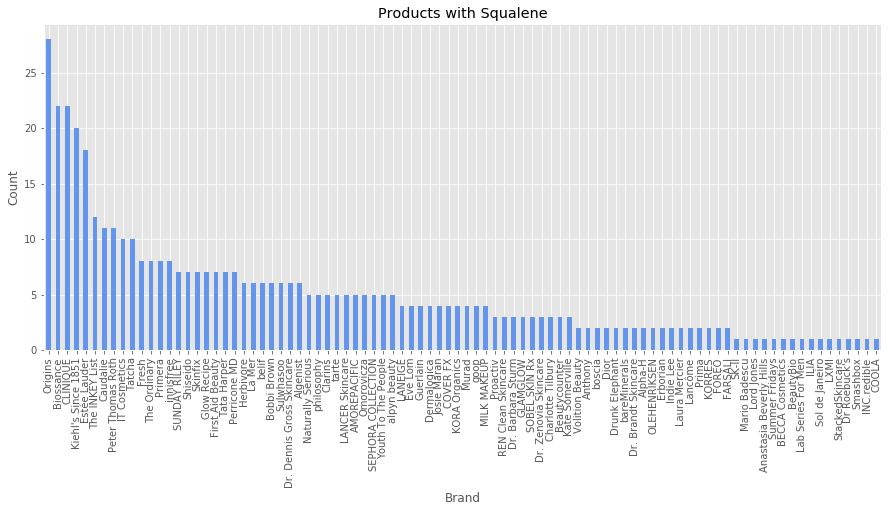

In [567]:
print(with_squalene.brand.unique())
with_squalene.groupby('brand').size()
plt.figure(figsize=(15,6))
with_squalene.groupby('brand').size().sort_values(ascending=False).plot.bar(color='cornflowerblue')
plt.title("Products with Squalene") 
plt.xlabel('Brand')  
plt.ylabel('Count')

In [664]:
vegan_squalene = []
clean_squalene = []
questionable_squalene = []
for i in range(len(with_squalene)):
    if 'vegan' in with_squalene['ingredient_callouts'].iloc[i].lower():
        vegan_squalene.append(with_squalene.iloc[i])
    elif 'clean at sephora' in with_squalene['ingredients'].iloc[i].lower():
        clean_squalene.append(with_squalene.iloc[i])
    else:
        questionable_squalene.append(with_squalene.iloc[i])
        
vegan_squalene = pd.DataFrame(vegan_squalene)
clean_squalene = pd.DataFrame(clean_squalene)
questionable_squalene = pd.DataFrame(questionable_squalene)

print("With squalene: ", len(with_squalene))
print("Vegan: ", len(vegan_squalene))
print("Clean: ", len(clean_squalene))
print("Questionable squalene: ", len(questionable_squalene))



With squalene:  454
Vegan:  148
Clean:  95
Questionable squalene:  211


Text(0, 0.5, 'Count')

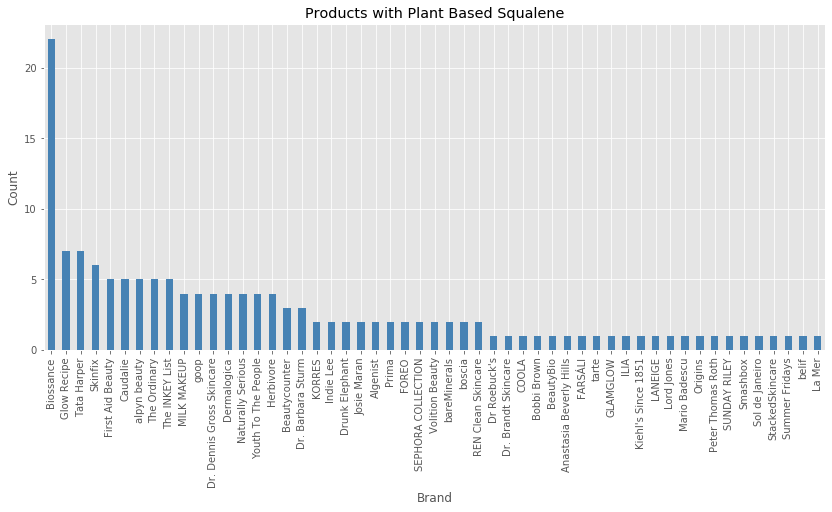

In [665]:
plt.figure(figsize=(14,6))
vegan_squalene.groupby('brand').size().sort_values(ascending=False).plot.bar(color='steelblue')
plt.title("Products with Plant Based Squalene") 
plt.xlabel('Brand')  
plt.ylabel('Count')


Text(0, 0.5, 'Count')

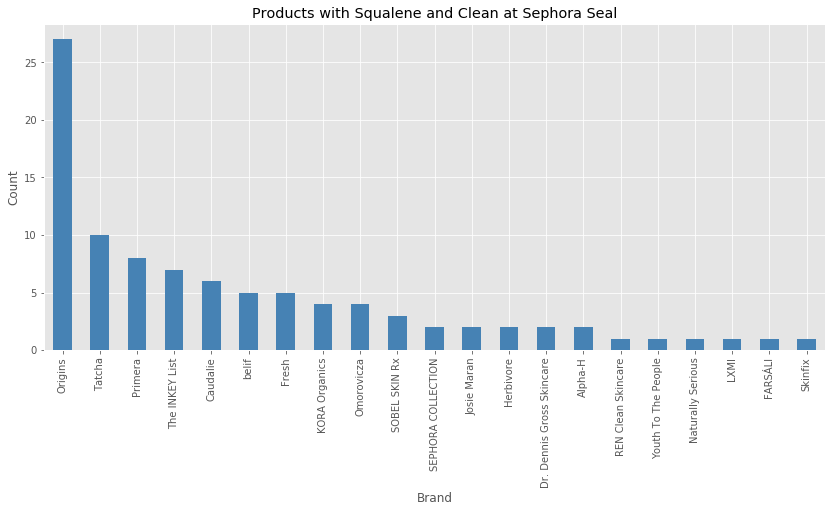

In [663]:
plt.figure(figsize=(14,6))
clean_squalene.groupby('brand').size().sort_values(ascending=False).plot.bar(color='steelblue')
plt.title("Products with Squalene and Clean at Sephora Seal") 
plt.xlabel('Brand')  
plt.ylabel('Count')

Text(0, 0.5, 'Count')

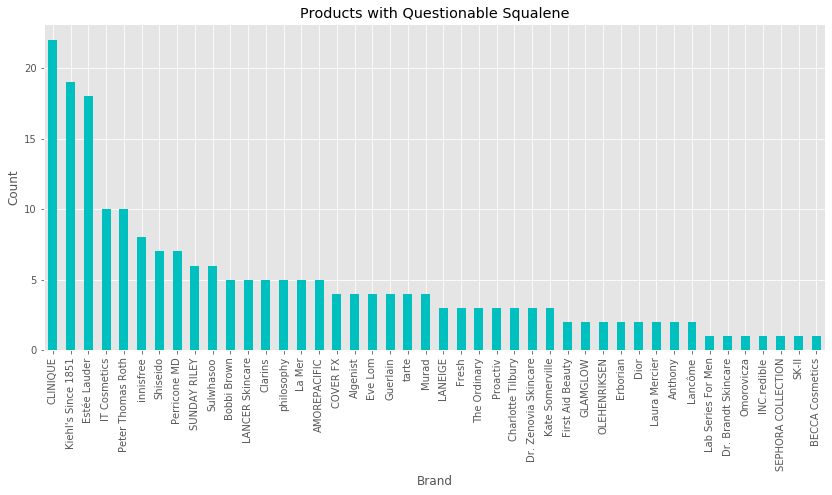

In [646]:
plt.figure(figsize=(14,6))
questionable_squalene.groupby('brand').size().sort_values(ascending=False).plot.bar(color='c')
plt.title("Products with Questionable Squalene") 
plt.xlabel('Brand')  
plt.ylabel('Count')

Top 10 Brands with Questionable Source of Squalene
brand
CLINIQUE              22
Kiehl's Since 1851    19
Estée Lauder          18
IT Cosmetics          10
Peter Thomas Roth     10
innisfree              8
Shiseido               7
Perricone MD           7
SUNDAY RILEY           6
Sulwhasoo              6
dtype: int64


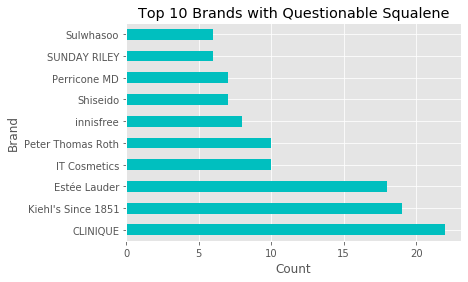

In [695]:
questionable_squalene.groupby('brand').size().sort_values(ascending=False).head(10).plot(kind='barh',color='c')
plt.title("Top 10 Brands with Questionable Squalene") 
plt.xlabel('Count')  
plt.ylabel('Brand')
topTen_questionable = questionable_squalene.groupby('brand').size().sort_values(ascending=False).head(10)
print("Top 10 Brands with Questionable Source of Squalene")
print(topTen_questionable)


Text(0, 0.5, 'Category')

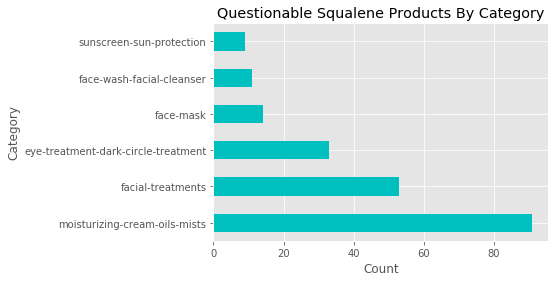

In [700]:
# Products with questionable squalene grouped by skincare category
questionable_squalene.groupby('category').size().sort_values(ascending=False).plot(kind='barh',color='c')
plt.title("Questionable Squalene Products By Category") 
plt.xlabel('Count')  
plt.ylabel('Category')

In [667]:
# Average price
nv_PricePerOz = round(questionable_squalene['per_oz'].mean(),2)
print("Average price for products with questionable squalene: ", nv_PricePerOz)
v_PricePerOz = round(vegan_squalene['per_oz'].mean(),2)
print("Average price for products with vegan squalene: ", v_PricePerOz)
c_PricePerOz = round(clean_squalene['per_oz'].mean(),2)
print("Average price for products with clean squalene: ", c_PricePerOz)

# Median price
nv_mPricePerOz = round(questionable_squalene['per_oz'].median(),2)
print("Median price for products with questionable squalene: ", nv_mPricePerOz)
v_mPricePerOz = round(vegan_squalene['per_oz'].median(),2)
print("Median price for with vegan squalene: ", v_mPricePerOz)
c_mPricePerOz = round(clean_squalene['per_oz'].median(),2)
print("Median price for with clean squalene: ", c_mPricePerOz)

Average price for products with questionable squalene:  131.35
Average price for products with vegan squalene:  49.53
Average price for products with clean squalene:  51.19
Median price for products with questionable squalene:  48.12
Median price for with vegan squalene:  35.85
Median price for with clean squalene:  37.65


In [668]:
# Mean and median prices grouped by skincare categories
nv_group = questionable_squalene.groupby('category')
nv_group_means = nv_group[['per_oz']].mean()
nv_group_median = nv_group[['per_oz']].median()

v_group = vegan_squalene.groupby('category')
v_group_means = v_group[['per_oz']].mean()
v_group_median = v_group[['per_oz']].median()

c_group = clean_squalene.groupby('category')
c_group_means = c_group[['per_oz']].mean()
c_group_median = c_group[['per_oz']].median()

nv_group_means

,per_oz
category,
eye-treatment-dark-circle-treatment,132.084333
face-mask,25.373333
face-wash-facial-cleanser,14.818889
facial-treatments,334.699592
moisturizing-cream-oils-mists,45.239882
sunscreen-sun-protection,20.510000


In [652]:
v_group_means

,per_oz
category,
eye-treatment-dark-circle-treatment,101.762000
face-mask,29.971111
face-wash-facial-cleanser,8.595833
facial-treatments,69.487778
moisturizing-cream-oils-mists,37.308814
sunscreen-sun-protection,21.092500


In [669]:
c_group_means

,per_oz
category,
eye-treatment-dark-circle-treatment,113.709286
face-mask,17.227500
face-wash-facial-cleanser,7.420000
facial-treatments,51.625263
moisturizing-cream-oils-mists,40.403750
sunscreen-sun-protection,38.972500


In [653]:
nv_group_median

,per_oz
category,
eye-treatment-dark-circle-treatment,120.000
face-mask,13.240
face-wash-facial-cleanser,7.200
facial-treatments,65.000
moisturizing-cream-oils-mists,32.060
sunscreen-sun-protection,20.585


In [654]:
v_group_median

,per_oz
category,
eye-treatment-dark-circle-treatment,96.000
face-mask,30.000
face-wash-facial-cleanser,6.750
facial-treatments,54.275
moisturizing-cream-oils-mists,30.770
sunscreen-sun-protection,17.325


In [670]:
c_group_median

,per_oz
category,
eye-treatment-dark-circle-treatment,99.00
face-mask,15.60
face-wash-facial-cleanser,8.88
facial-treatments,49.41
moisturizing-cream-oils-mists,37.65
sunscreen-sun-protection,37.65


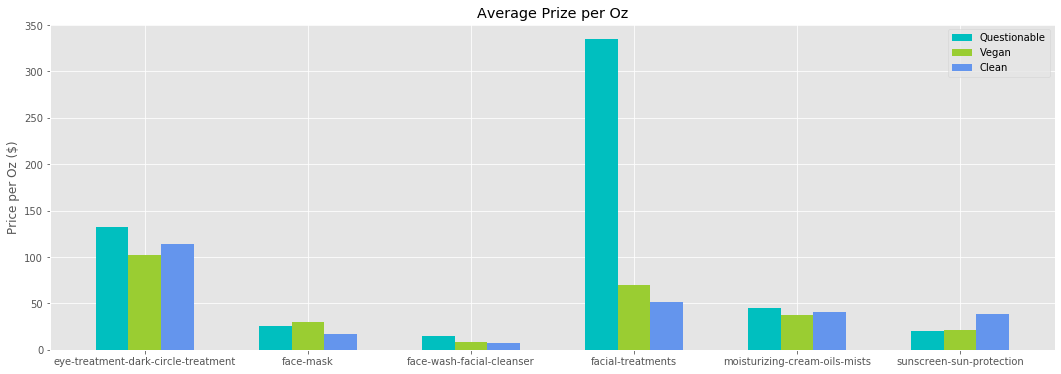

In [696]:
labels = ['eye-treatment-dark-circle-treatment', 'face-mask',
       'face-wash-facial-cleanser', 'facial-treatments',
       'moisturizing-cream-oils-mists', 'sunscreen-sun-protection']
#labels2 = ['x', 'y', 'z', 'a', 'b', 'c']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(18,6))
ax.bar(x - 0.2, list(round(nv_group_means['per_oz'],2)), width, label='Questionable', color='c')
ax.bar(x, list(round(v_group_means['per_oz'],2)), width, label='Vegan', color='yellowgreen')
ax.bar(x + 0.2, list(round(c_group_means['per_oz'],2)), width, label='Clean', color='cornflowerblue')

ax.set_ylabel('Price per Oz ($)')
ax.set_title('Average Prize per Oz')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


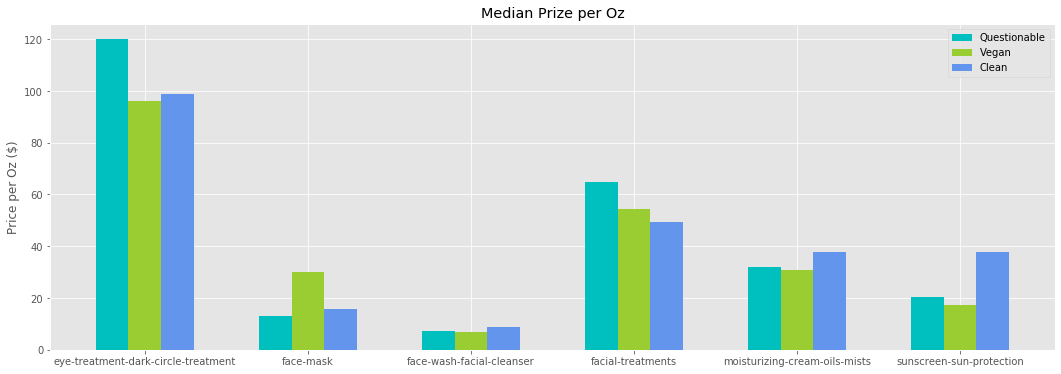

In [697]:
labels = ['eye-treatment-dark-circle-treatment', 'face-mask',
       'face-wash-facial-cleanser', 'facial-treatments',
       'moisturizing-cream-oils-mists', 'sunscreen-sun-protection']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(18,6))
ax.bar(x - 0.2, list(round(nv_group_median['per_oz'],2)), width, label='Questionable', color='c')
ax.bar(x, list(round(v_group_median['per_oz'],2)), width, label='Vegan', color='yellowgreen')
ax.bar(x + 0.2, list(round(c_group_median['per_oz'],2)), width, label='Clean', color='cornflowerblue')

ax.set_ylabel('Price per Oz ($)')
ax.set_title('Median Prize per Oz')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

280

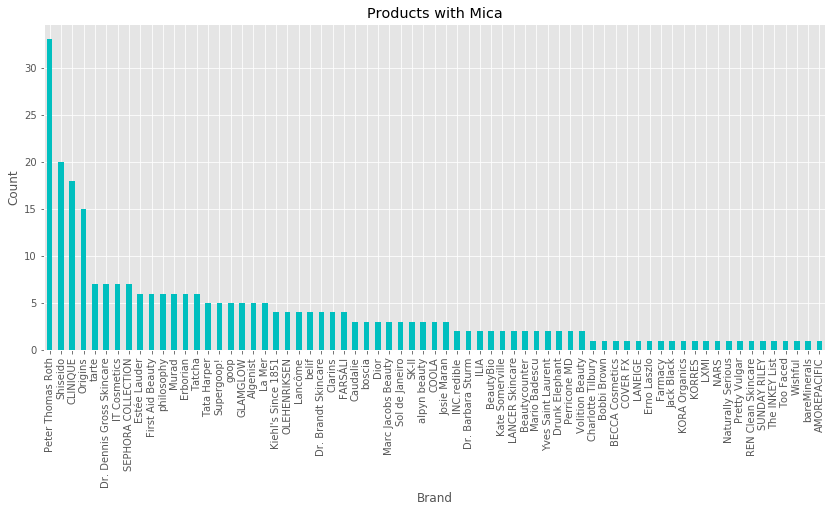

In [657]:
mica = ['mica']
with_mica = match_bad_ingredients(mica)
plt.figure(figsize=(14,6))
with_mica.groupby('brand').size().sort_values(ascending=False).plot.bar(color='c')
plt.title("Products with Mica") 
plt.xlabel('Brand')  
plt.ylabel('Count')

len(with_mica)

Text(0, 0.5, 'Brand')

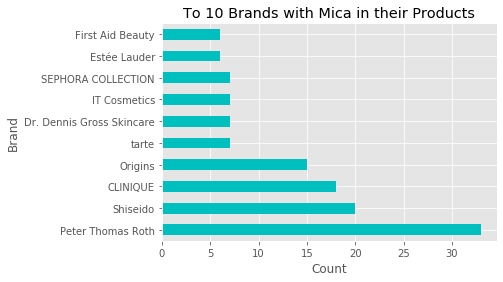

In [658]:
with_mica.groupby('brand').size().sort_values(ascending=False).head(10).plot(kind='barh', color='c')
plt.title("To 10 Brands with Mica in their Products") 
plt.xlabel('Count')  
plt.ylabel('Brand')

Text(0, 0.5, 'Category')

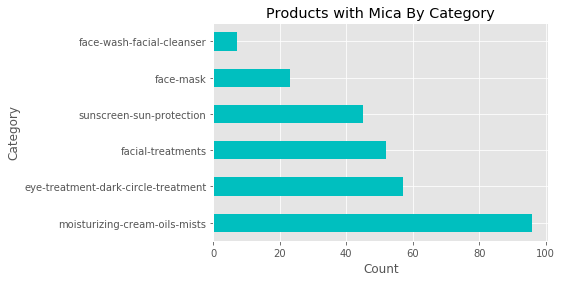

In [698]:
# Products with mica grouped by skincare category
with_mica.groupby('category').size().sort_values(ascending=False).plot(kind='barh', color='c')
plt.title("Products with Mica By Category") 
plt.xlabel('Count')  
plt.ylabel('Category')

Text(0, 0.5, 'Count')

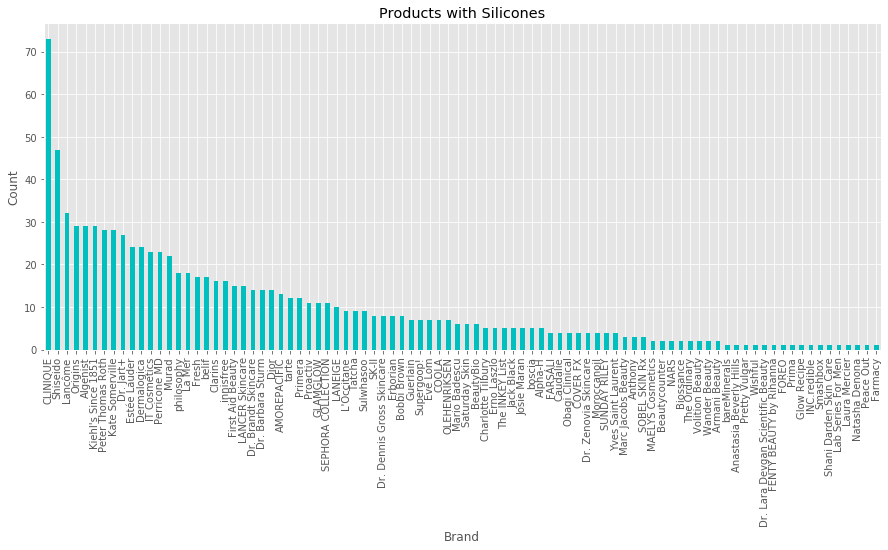

In [660]:
silicones = ['siloxane', 'dimethicone', 'cyclomethicone', 'cyclohexasiloxane', 'cetearyl methicone',
'cyclopentasiloxane']
with_silicones = match_bad_ingredients(silicones)
len(with_silicones) #913
plt.figure(figsize=(15,6))
with_silicones.groupby('brand').size().sort_values(ascending=False).plot.bar(color='c')
plt.title("Products with Silicones") 
plt.xlabel('Brand')  
plt.ylabel('Count')

Text(0, 0.5, 'Brand')

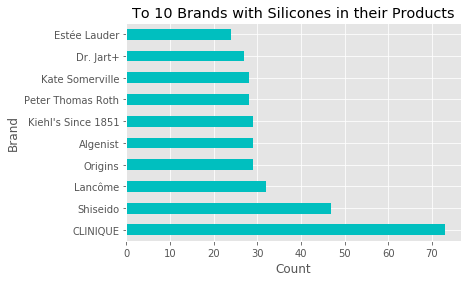

In [661]:
with_silicones.groupby('brand').size().sort_values(ascending=False).head(10).plot(kind='barh', color='c')
plt.title("To 10 Brands with Silicones in their Products") 
plt.xlabel('Count')  
plt.ylabel('Brand')

Text(0, 0.5, 'Category')

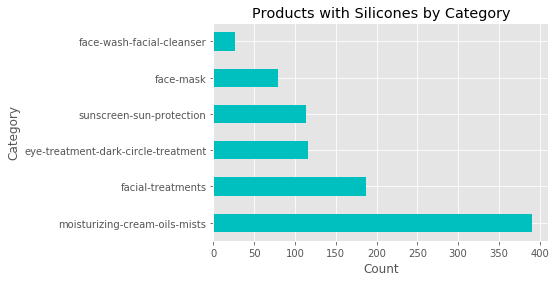

In [699]:
# Products with silicones grouped by skincare category
with_silicones.groupby('category').size().sort_values(ascending=False).plot(kind='barh', color='c')
plt.title("Products with Silicones by Category") 
plt.xlabel('Count')  
plt.ylabel('Category')


In [ ]:
#palm = [palm kernel, palm fruit oil, palmate, glyceryl, stearate, palmitic acid, Palm stearine, palmitoyl oxostearamide, palmitoyl tetrapeptide-3]